<a href="https://colab.research.google.com/github/rafaelfabri/Data-Science/blob/master/Competi%C3%A7%C3%A3o_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Competição Titanic**

## **1. Introdução**

![alt text](https://wallup.net/wp-content/uploads/2016/07/20/28197-Titanic.jpg)

Quando o RMS Titanic foi construído em 1909 e lançado em 1911, atribuiu-se ao navio a lenda de inafundável, no entanto a colisão com um iceberg na noite de 14 de abril de 1912 causou, na madrugada seguinte o naufrágio da embarcação e infelizmente a morte de diversos tripulantes.

A partir do desastre notou-se erros de projeto, falhas de segurança, falhas de normas marítimas e diversos problemas que levaram a mudanças de leis internacionais de navegação. Essa tragédia se tornou um marco histórico que até hoje é lembrada e estudada por muitos cientistas.

A plataforma Kaggle teve a idéia de lançar um desafio a respeito desse naufrágio. A finalidade desta competição é introduzir cientistas de dados a plataforma, a partir deste problema os competidores são desafiados a criar um modelo de machine learning para prever quais pessoas sobrevieram ou morreriam ao naufrágio levando em conta algumas características individuais.


## **Objetivo**

O objetivo deste projeto é estudar o conjunto de dados da competição Titanic, disponibilizado pela plataforma de competições Kaggle.

Nesse projeto realizaremos uma análise exploratória dos dados para entendermos melhor o problema. Assim será possível verificarmos os fatores mais importantes para a sobrevivência dos tripulantes no navio RMS Titanic.

Posteriormente, iremos aplicar um modelo de _machine learning_ que possa prever quais pessoas sobreviveriam ao naufrágio, ao final será realizada a submissão das respostas para verificarmos a quantidade de acertos da nossa previsão.



## **Sumário**

  1. Introdução 
  2. Importando bibliotecas
  3. Descrisão do conjunto de dados disponibilizado pela Kaggle
  4. Análise exploratória
    
    4.1 Primeiras 5 linhas do dataset/quantidades de linhas e colunas
    
    4.2 Analisando variáveis e ausência de dados

    4.3 Explorando dados

    * 4.3.1 Quantidade de homens e mulheres

    * 4.3.2 Quantidade de homens e mulheres que faleceram e sobreviveram

    * 4.3.3 O nível sócioeconomico das pessoas influenciavam em sua sobrevivência

    * 4.3.4 O ponto de embarque influência na sobrevivência das pessoas

    4.4 Explorando os dados: foco estatístico

    * 4.4.1 Faixa etária dos tripilantes

    * 4.4.2 Outliers

  5. Machine Learning

    5.1 Pré processamento

    * 5.1.1 Corregindo dados ausentes

    * 5.1.2 Padronizando dados

    * 5.1.3 Transformação de variáveis categóricas em valores inteiros

    5.2 Aplicando modelo de regressão logística

  6. Conclusão

## **2. Importando bibliotecas**

![alt text](https://miro.medium.com/max/2880/1*RIrPOCyMFwFC-XULbja3rw.png)

A primeira tarefa a ser realizada é importar as bibliotecas necessárias.

Abaixo foi importado todas as bibliotecas, com exceção das de _machine learning_.

In [ ]:
#istalando um biblioteca
!pip install pywaffle -q

#importando bibliotecas
from pywaffle import Waffle 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 532kB 8.2MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **3. Descrição do conjunto de dados disponibilizado pela Kaggle**

![texto alternativo](https://image.freepik.com/free-vector/matrix-style-binary-code-digital-background-with-falling-numbers_1017-25336.jpg)

O conjunto de dados disponibilizado apresenta dois _datasets_(conjunto de dados).

O primeiro conjunto de dados é chamado de **train**, que neste projeto será denominado pela variável DataFrame **df_train**. Neste primeiro DataFrame existem variáveis (colunas) dependentes e independentes:

* y: dependentes (Survived)
* x: independestes (Sex, Pclass, Fare, Age etc) 11 no total.

Assim esse conjunto possui 12 colunas/variáveis, e 851 linhas/entradas, cada linha é a informação de entrada de um passageiro do navio.

O segundo conjunto de dados é chamado de **test**, denominado como **df_test**, este que será utilizado no final do projeto para realizar as previsões e submissões. Vale ressaltar que estes dados apenas possuem as variáveis independentes, portanto é necessário prever as variáveis dependentes(pessoa sobreviveu ou não). Esse DataFrame apresenta 418 linhas e 11 colunas.

Abaixo foi importado os dados.

In [ ]:
#importando dados
df_train = pd.read_csv("https://www.dropbox.com/s/fm2dx26bjkiovxp/train.csv?dl=1")
df_test = pd.read_csv('https://www.dropbox.com/s/m4hm5bdegyhjmec/test.csv?dl=1')

## **4. Análise exploratória**

![alt text](https://image.freepik.com/free-photo/data-management-system-dms-with-business-analytics-concept_103164-71.jpg)

A partir deste capítulo iniciaremos a análise exploratória do conjunto de dados da competição Titanic, este estudo consiste em verificar os dados presentes na variável *df_train* e em alguns pontos específicos *df_test*.

A finalidade deste tópico é trazer um melhor entendimento sobre dados, assim podendo ser obtida hipóteses das variáveis mais importantes dentro do conjunto.

Na realidade essas variáveis presente do DataFrame *df_train* são as características de cada passeiro presente no navio, lembrando-se que cada linha do conjunto é referente a um determinado passageiro. Portanto, a partir da análise exploratória será possível saber quais características determinaram a sobrevivência de cada tripulante do titanic, por exemplo:


* sexo;
* idade;
* classe social;
* ponto de embarque;
* etc.

### **4.1 Primeiras 5 linhas do dataset/quantidades de linhas e colunas**

Primeiramente, devemos confirmar a quantidade de linhas e colunas presentes tanto nos dados train e test.

In [ ]:
#verificando quantidade de linhas e colunas para df
print('CONJUNTO DE DADOS TRAIN')
print('quantidade de linhas/entradas:', df_train.shape[0])
print('quantidade de colunas/variáveis:', df_train.shape[1])

CONJUNTO DE DADOS TRAIN
quantidade de linhas/entradas: 891
quantidade de colunas/variáveis: 12


In [ ]:
#verificando quantidade de linhas e colunas para test
print('CONJUNTO DE DADOS TEST')
print('quantidade de linhas/entradas:', df_test.shape[0])
print('quantidade de colunas/variáveis:', df_test.shape[1])

CONJUNTO DE DADOS TEST
quantidade de linhas/entradas: 418
quantidade de colunas/variáveis: 11


Abaixo foi plotado as 5 primeiras linhas das variáveis *df_train* e *df_test*. 

In [ ]:
#verificando 5 primeiras linhas do conjunto de dados
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


O conjunto df_test é bem semelhante ao df_train, porém não apresenta a coluna **Survived**. 

In [ ]:
#verificando 5 primeiras linhas do conjunto de dados
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **4.2 Analisando variáveis e ausência de dados**

É possível passar a coluna **PassengerId** para o índice nas variáveis df_train e df_test.

In [ ]:
#colocando a variável PassengerId no Index
df_train.index = df_train['PassengerId'] 
df_test.index = df_test['PassengerId']

In [ ]:
#excluindo a variável 
df_train.drop(labels=['PassengerId'], axis=1, inplace=True)
df_test.drop(labels=['PassengerId'], axis=1, inplace=True)

Abaixo foi plotado os tipos de cada coluna/variável do DataFrame df_train, sabendo o tipo de cada variável pode-se ter uma melhor noção do conjunto de dados.

In [ ]:
#plotando o tipo de cada variável
df_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Abaixo está o significado de cada uma das variáveis.

**Significado das variáveis**

* Survived: se o passageiro sobreviveu a viagem (1-sim / 0-não)
* Pclass: situação econômica (1st = Upper, 2nd = Middle, 3rd = Lower)
* Name: nome do passageiro
* Sex: sexo do passageiro (Male - masculino) (Female - feminino)
* Age: idade do passageiro
* SibSp: Irmãos / cônjuges a bordo 
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: País / filhos a bordo
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: tipo de ticket
* Fare: tarifa do passageiro
* Cabin: Classe da cabine
* Embarked: Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

Algo muito importante, a ser analisado em qualquer conjunto de dados, é a verificação da quantidade de dados ausentes. A ausência de dados pode trazer diversos problemas a uma análise exploratória ou a criação de um modelo de *machine learning*.

Exemplo destes problemas são a inutilização de uma variável devido a grande falta de informações, a exclusão de algumas linhas para eliminar dados ausentes, e problemas para o desenvolvimento de modelos de *machine learning*.

Portanto, abaixo foi realizado um comando para verificar a ausência de dados presentes nos dois conjuntos.

In [ ]:
( ( df_train.isnull().sum() )/df_train.shape[0] ).sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
Fare        0.000000
Ticket      0.000000
Parch       0.000000
SibSp       0.000000
Sex         0.000000
Name        0.000000
Pclass      0.000000
Survived    0.000000
dtype: float64

In [ ]:
( ( df_test.isnull().sum() )/df_test.shape[0]).sort_values(ascending=False)

Cabin       0.782297
Age         0.205742
Fare        0.002392
Embarked    0.000000
Ticket      0.000000
Parch       0.000000
SibSp       0.000000
Sex         0.000000
Name        0.000000
Pclass      0.000000
dtype: float64

Seria interessante utilizar a variável Cabin para análise, o tipo cabine pode ter influênica para selecionar quem entrava nos botes salva vidas ou não, porém verificamos uma informação importante nos códigos anteriores.

A variável Cabin apresenta em df_train um percentual de 77.1044% de dados ausentes, sendo um grande número percentual de dados faltantes, já df_test o percentual é de 78.2297%.

Logo devido a grande ausência de dados, a variável Cabin será totalmente excluída dos dois conjuntos de dados.



In [ ]:
#removendo variável
df_train.drop(labels=['Cabin'], axis=1, inplace=True)
df_test.drop(labels=['Cabin'], axis=1, inplace=True)

No DataFrame df_train e df_test as variáveis **Age**, **Embarked** e **Fare** também apresentam dados ausentes, porém em um percentual menor:
* Age = 19.8653%
* Embarked = 20.5742%
* Fare = 0.2392

Percebe-se que a proporção de dados ausentes é bem menor, por enquanto deixaremos assim essas variáveis. No capítulo 5 vamos determinar o que fazer, mas já adianto que existem duas possibilidades:

* excluir as linhas com dados ausentes;
* ou substituir as linhas ausentes:
  * a substituição no caso de **Age**  e **Fare** pode ser feita através da média de todas as idades, pois esta é uma variável contínua;
  * a substituição no caso de **Embarked** pode ser feita verificando qual categoria aparece com mais frequência, como essa variável é discreta, a moda é métrica que deve ser usada.

Para df_test será pensado a mesma forma.

In [ ]:
print(( ( df_train.isnull().sum() )/df_train.shape[0] ).sort_values(ascending=False))

Age         0.198653
Embarked    0.002245
Fare        0.000000
Ticket      0.000000
Parch       0.000000
SibSp       0.000000
Sex         0.000000
Name        0.000000
Pclass      0.000000
Survived    0.000000
dtype: float64


In [ ]:
print('NOVO CONJUNTO DE DADOS TRAIN')
print('quantidade de linhas/entradas:', df_train.shape[0])
print('quantidade de colunas/variáveis:', df_train.shape[1])

NOVO CONJUNTO DE DADOS TRAIN
quantidade de linhas/entradas: 891
quantidade de colunas/variáveis: 10


### **4.3 Explorando dados**

In [ ]:
#verificando 5 primeiras linhas do conjunto de dados
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


A partir deste capítulo 4.3, começaremos a realização de gráficos para  observar possíveis hipóteses e características dos sobriviventes do Titanic.

#### **4.3.1 Quantidade de homens e mulheres**

Inicialmente vamos verificar quantos homens e mulheres estavam no navio.

In [ ]:
#criando legendas para o gráfico a seguir
altura_1 = []
altura_1.append((df_train['Sex'] == 'male').sum())
altura_1.append((df_train['Sex'] == 'female').sum())
posicao_1 = np.arange(0,2,1)

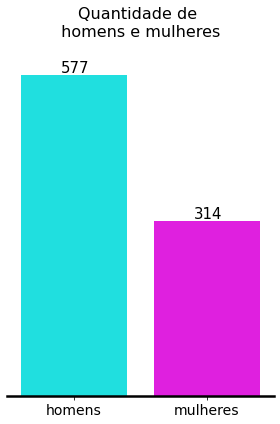

In [ ]:
#criando fig e ax
fig, ax = plt.subplots(figsize=(4,6))

#plotando gráfico
sns.countplot(x=df_train['Sex'], ax=ax, palette=['#00FFFF', '#FF00FF'])

#títulos e legendas
ax.set_title('Quantidade de \n homens e mulheres \n', fontdict={'fontsize':16})
ax.set_ylabel('')
ax.set_xlabel('')

#alterando labels ticks x
ax.set_xticklabels(labels=['homens', 'mulheres'], fontdict={'fontsize':14})

#retirando ticks esquerdo
ax.tick_params(labelleft=False, left=False)

#aumentando espessura do axis inferior 
ax.spines['bottom'].set_linewidth(2.5)

#retirando axis direito, superior e esquerdo
for axis in ['right', 'top', 'left']:
  ax.spines[axis].set_color('none')

#adicionando legendas 
for i in range(0,2,1):
  ax.text(x=posicao_1[i]-0.1, y=altura_1[i]+5, s=str(altura_1[i]), fontsize=15)

#otimizando tamanho
fig.tight_layout();

Acima foi plotado o gráfico de barras referente a quantidade de homens e mulheres no Titanic, observa-se que os homens estavam em maior número no navio.

#### **4.3.2 Quantidade de homens e mulheres que faleceram e sobreviveram**

In [ ]:
#criando legendas para o gráfico a seguir
altura_2 = df_train.groupby(['Sex']).Survived.value_counts().values
posicao_2 = np.arange(0,4,1)

Abaixo foi realizado um gráfico de barras para ver a quantidade de homens e mulheres sobreviventes e falecidos.

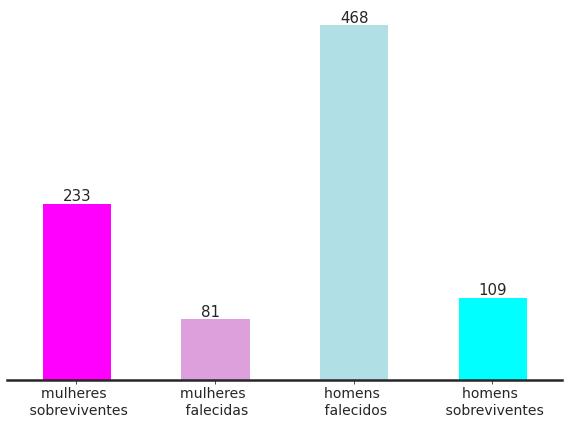

In [ ]:
#definindo estilo
sns.set_style('ticks')

#criando fig e ax
fig, ax = plt.subplots(figsize=(8,6))

#plotando gráfico
df_train.groupby(['Sex']).Survived.value_counts().plot(kind='bar', ax=ax, color=['#FF00FF', '#DDA0DD', '#B0E0E6',  '#00FFFF'])

# legendas
ax.set_ylabel('')
ax.set_xlabel('')

#alterando labels ticks x
ax.set_xticklabels(labels=['mulheres \n sobreviventes', 'mulheres \n falecidas',
                           'homens \n falecidos', 'homens \n sobreviventes'], fontdict={'fontsize':14})

#retirando ticks esquerdo
ax.tick_params(labelleft=False, left=False)

#rotacionando lables dos ticks x
ax.tick_params(axis='x', rotation=0)

#aumentando espessura do axis inferior 
ax.spines['bottom'].set_linewidth(2.5)

#retirando axis direito, superior e esquerdo
for axis in ['right', 'top', 'left']:
  ax.spines[axis].set_color('none')

#adicionando legendas 
for i in range(0,4,1):
  ax.text(x=posicao_2[i]-0.1, y=altura_2[i]+3, s=str(altura_2[i]), fontsize=15)

#otimizando tamanho
fig.tight_layout();


A partir do gráfico de barras realizado, pode-se determinar que a maioria dos sobreviventes foram mulheres, a quantidade foi de 233, mais do que o dobro de homens sobreviventes que foi 109.


Outra observação importante é que, devido a grande sobrevivência de mulheres, o maior número de mortes foram de homens, em uma quantidade de 468.

Abaixo foi realizado um gráfico de Waffle, onde podemos encontrar o percentual de homens e mulheres que sobreviveram e faleceram. Com o gráfico de Waffle temos uma melhor noção do gráfico de barras acima.

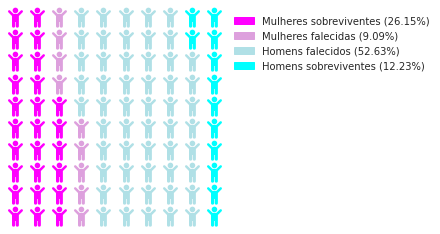

In [ ]:
#criando legendas
data_leg = {'Mulheres sobreviventes' : 26.15, 'Mulheres falecidas' : 9.09,
            'Homens falecidos' : 52.63, 'Homens sobreviventes' : 12.23}

#criando gráfico de Waffle
fig = plt.figure(FigureClass = Waffle, 
                 rows = 10, 
                 columns = 10,  values = {'Mulheres sobreviventes' : 233, 'Mulheres falecidas' : 81,
                                          'Homens sobreviventes' : 469, 'Homens falecidos' : 109},
                 legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'framealpha': 0},
                 labels = ['{0} ({1}%)'.format(k, v) for k, v in data_leg.items()],
                 icons = 'child', icon_size = 20,
                 colors = ('#FF00FF', '#DDA0DD', '#B0E0E6',  '#00FFFF'))

#plotando gráfico Waffle
fig.set_tight_layout(False)

#mostrando gráfico
plt.show()

Abaixo foi realizado dois gráficos de pizza. Um gráfico somente para mulheres e outro para homens.

Através dos resultados dos gráficos de pizza, observamos que 74,2% de todas as mulheres do návio sobreviveram, enquanto o de homens apenas 18,9% se salvaram. 

In [ ]:
#variáveis necessárias para criar o gráfico de pizza
pie_3_mul = altura_2[:2] 
pie_3_hom = altura_2[2:]

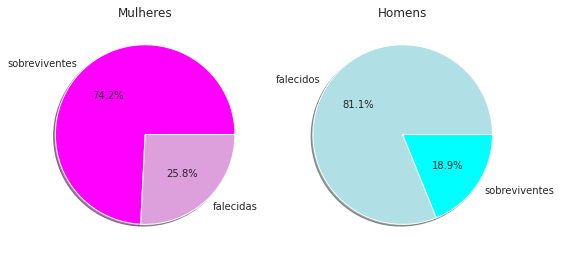

In [ ]:
#criando fig e ax
fig, ax = plt.subplots(ncols=2, figsize=(8,5))

#plotando gráfico
ax[0].pie(x=pie_3_mul, labels=['sobreviventes','falecidas'], colors=['#FF00FF', '#DDA0DD'], autopct='%1.1f%%', shadow=True)
ax[1].pie(x=pie_3_hom, labels=['falecidos', 'sobreviventes'], colors=['#B0E0E6',  '#00FFFF'], autopct='%1.1f%%', shadow=True)

#títulos e legendas
ax[0].set_title('Mulheres')
ax[1].set_title("Homens")

#otimizando tamanho
fig.tight_layout();

*Algo que se deve levar em conta, é que a quantidade de homens era bem maior do que de mulheres, porém, mesmo assim somente 18,9% sobreviveram, esse resultado mostra o quão importante foi salvar as vidas das mulheres que estavam no naufrágio, estas que tiveram uma maior prioridade. *

#### **4.3.3 O nível sócioeconomico das pessoas influenciavam em sua sobrevivência**

Algo interessante para verificarmos está relacionado a condição financeira das pessoas, será que esse fator determinava a possibilidade delas entrarem nos botes salva vidas.

Por essa razão foi realizado o gráfico de barras abaixo, a visualização nos mostra o percentual de homens e mulheres de cada classe que sobreviveram.


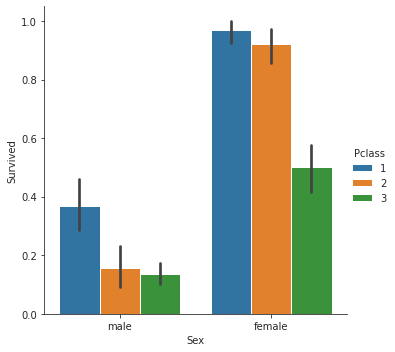

In [ ]:
#plotando gráfico
sns.catplot(x='Sex', y='Survived', hue='Pclass', data=df_train, kind='bar');

Primeiramente, observaremos apenas a primeira classe, em azul. Percebe-se que tanto os homens e mulheres dessa classe, que tem condições econômicas mais altas, tiveram maior percentual de sobrevivência.

Nota-se também que as mulheres desta primeira classe e da segunda classe quase todas sobreviveram.

Já os homens de segunda e terceira classe poucos sobreviveram. Dentre as mulheres, as de terceira classe foram as que mais morreram.




*A partir desse gráfico pode-se dizer que a classe social da pessoa influenciava muito para sua sobrevivência no Titanic, se você fosse uma pessoa de terceira classe, a qual tem uma condição inferior as outras, sua chance de sobreviver era bem menor, mesmo sendo uma mulher.*

#### **4.3.4 O ponto de embarque influência na sobrevivência das pessoas**

Acredito que seja difícil o ponto de embarque influenciar na sobrevivência dos tripulantes, porém pode-se dizer que talvez haja alguma correlação. Exemplo quem embarque de tal ponto pode ter uma melhor condição financeira ou algum outro fator.

Abaixo foi realizado um gráfico de barras para ver o percentual de sobrevivência com relação ao ponto de embarque e sexo.

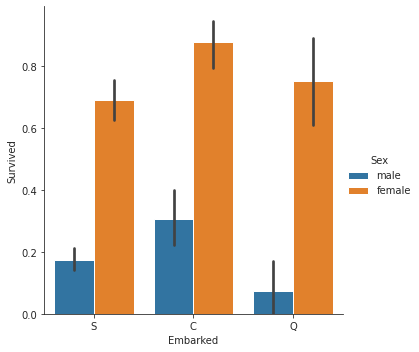

In [ ]:
#plotando gráfico
sns.catplot(x='Embarked', y='Survived', hue='Sex', data=df_train, kind='bar');

*Observa-se algo interessante no gráfico de barras, quem embarcou do porto C(cidade de Cherbourg) teve relativamente um maior percentual de sobrevivência.*

Agora que analisamos bem uma parte do conjunto, partiremos para uma análise mais estatística com gráficos de distribuição e boxplot.

### **4.4 Explorando os dados: foco quantitativo**



Ainda serão explorados os dados, porém agora será utilizada as variáveis quantitivas, com objetivo de verificar as distribuições das idades, gráficos de boxplot e descrições estatísticas.

### **4.4.1 Faixa etária dos tripulantes**

Uma variável interessante a ser verificada no conjunto *df_train* é a coluna *Age*. A partir desta podemos tirar algumas hipóteses sobre as idades das pessoas que sobreviveram e morreram.

In [ ]:
#função para regulagem dos ticks
def my_ticks(maximo, quant, minimo):
    ticks = []
    for i in range(minimo, maximo+1, quant):
        ticks.append(i)
    return ticks;  

No histograma abaixo, observa-se que a maior parte das pessoas tem entre 16 e 40 anos, além disso o intervalo de idade mais frequente era de 20 a 24 anos.

Podemos observar que existe um número significativo de crianças e bebês de 0 a 4 anos de idade.

Esse histograma nos permite entender melhor a idade das pessoas que estavam no Titanic.

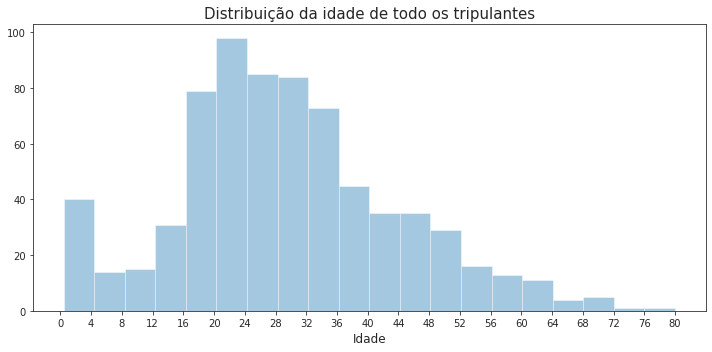

In [ ]:
#definindo estilo
sns.set_style('ticks')

#criando fig e ax
fig, ax = plt.subplots(figsize=(10,5))

#plotando gráfico
sns.distplot(a=df_train['Age'], kde=False, bins=20, ax=ax)

#alterando labels ticks x
ax.set_xticks(my_ticks(int(df_train['Age'].max()), 4, 0))
ax.set_xticklabels(my_ticks(int(df_train['Age'].max()), 4, 0))

#títulos e legendas
ax.set_title('Distribuição da idade de todo os tripulantes', fontdict = {'fontsize':15})
ax.set_xlabel('Idade', fontdict = {'fontsize':12})

#otimizando tamanho
fig.tight_layout()

Abaixo foi realizado dois gráficos. Um histograma mostra a distribuição percentual de sobreviventes e mortos em relação as idades dos tripulantes, enquanto o outro histograma mostra a quantidade exata por intervalos de idades.

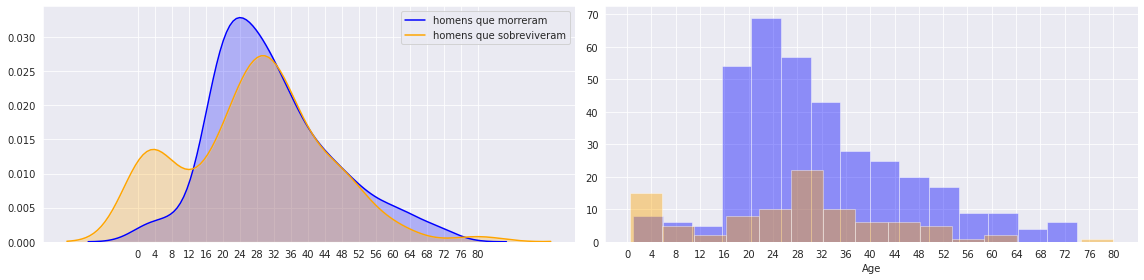

In [ ]:
#definindo estilo
sns.set_style('darkgrid')

#criando fig e ax
fig, ax = plt.subplots(ncols = 2, figsize=(16,4))

#plotando gráfico
sns.kdeplot(data=df_train[(df_train['Sex']=='male') & (df_train['Survived']==0)]['Age'], ax=ax[0], shade=True, color='blue',)
sns.kdeplot(data=df_train[(df_train['Sex']=='male') & (df_train['Survived']==1)]['Age'], ax=ax[0], shade=True, color='orange')

#plotando gráfico
sns.distplot(a=df_train[(df_train['Sex']=='male') & (df_train['Survived']==0)]['Age'], ax=ax[1], color='blue', kde=False, bins=15)
sns.distplot(a=df_train[(df_train['Sex']=='male') & (df_train['Survived']==1)]['Age'], ax=ax[1], color='orange', kde=False, bins=15)

#criando legenda
ax[0].legend(labels=['homens que morreram','homens que sobreviveram'])

#alterando labels ticks x
ax[0].set_xticklabels( labels = my_ticks( int( df_train[(df_train['Sex']=='male') & (df_train['Survived']==1)]['Age'].max() ), 4, 0 ) )
ax[0].set_xticks( my_ticks( int( df_train[(df_train['Sex']=='male') & (df_train['Survived']==1)]['Age'].max() ), 4, 0 ) )

#alterando labels ticks x
ax[1].set_xticklabels( labels = my_ticks( int( df_train[(df_train['Sex']=='male') & (df_train['Survived']==1)]['Age'].max() ), 4, 0 ) )
ax[1].set_xticks( my_ticks( int( df_train[(df_train['Sex']=='male') & (df_train['Survived']==1)]['Age'].max() ), 4, 0 ) )

#otimizando tamanho
fig.tight_layout();


Nota-se no segundo histograma que a quantidade de homens mortos é bem maior do que os sobreviventes, porém, em relação as crianças de 0 a 4 anos a quantidade de sobreviventes é maior, indicando uma preocupação em salvar vidas de bebes e crianças do sexo masculino. 

Entre crianças e adolescentes de 4 a 16 anos percebe-se uma quantidade proporcional entre os mortos e sobreviventes, mostrando uma certa preocupação com os jovens dessa idade. 

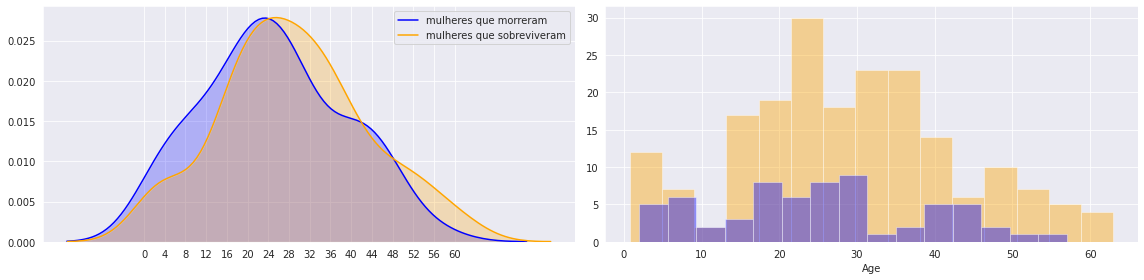

In [ ]:
#definindo estilo
sns.set_style('darkgrid')

#criando fig e ax
fig, ax = plt.subplots(ncols = 2, figsize=(16,4))

#plotando gráfico
sns.kdeplot(data=df_train[(df_train['Sex']=='female') & (df_train['Survived']==0)]['Age'], ax=ax[0], color='blue', shade=True)
sns.kdeplot(data=df_train[(df_train['Sex']=='female') & (df_train['Survived']==1)]['Age'], ax=ax[0], color='orange', shade=True)

#plotando gráfico
sns.distplot(a=df_train[(df_train['Sex']=='female') & (df_train['Survived']==1)]['Age'], ax=ax[1], color='orange', kde=False, bins=15)
sns.distplot(a=df_train[(df_train['Sex']=='female') & (df_train['Survived']==0)]['Age'], ax=ax[1], color='blue', kde=False, bins=15)

#alterando labels ticks x
ax[0].set_xticklabels( labels = my_ticks( int( df_train[(df_train['Sex']=='female') & (df_train['Survived']==1)]['Age'].max() ), 4, 0 ) )
ax[0].set_xticks( my_ticks( int( df_train[(df_train['Sex']=='female') & (df_train['Survived']==1)]['Age'].max() ), 4, 0 ) )

#criando legenda
ax[0].legend(labels=['mulheres que morreram','mulheres que sobreviveram'])

#otimizando tamanho
fig.tight_layout();


Este histograma mostra que praticamente que as mulheres de todas as idades tiveram chances de sobrevivência. Apenas as de 10 anos tiveram uma quantidade semelhante de mortes sobreviventes.

### **4.4.2 Outliers**

A seguir foi realizado uma análise estatística das variáveis int e float de *df_train*. A partir da tabela abaixo podemos ter uma noção de possíveis Outliers. 

Deve-se olhar para a grandeza do desvio padrão em relação a média, e comparar se a média e mediana estão próximas para verificar possíveis presenças de Outliers.

In [ ]:
#plotando descrição estatística
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As variáveis *Survived Pclass SibSp Parch* que são variáveis inteiras, mas classificatórias, e não devem ser análisadas. Logo focando apenas em *Age e *Fare*.

Em *Age* percebe-se que a média e mediana estão bem próximas, e o desvio padrão é a metade da mediana e média, mostrando que não há uma alta variabilidade. Dessa maneira olhando apenas a descrição estatítica não parece conter Outliers.

Já em relação a variável *Fare* há um alta diferença entre média e mediana, e seu desvio padrão é maior do que a própria média e mediana, mostrando que existe uma alta variabilidade, podendo conter uma significante quantidade de Outliers.

Para confirmos a hipótese anterior, abaixo encontra-se dois box plot das variáveis citadas acima.

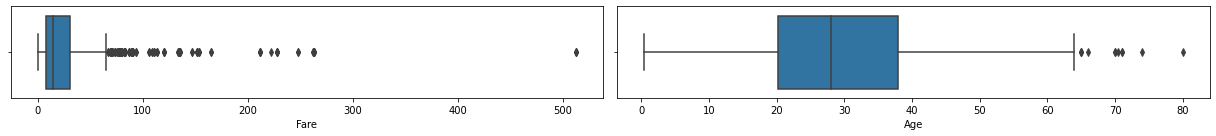

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(17,2))

sns.boxplot(x=df_train['Fare'], ax=ax[0])
sns.boxplot(x=df_train['Age'], ax=ax[1])

fig.tight_layout();

In [ ]:
IQR_age = df_train['Age'].quantile(0.75) - df_train['Age'].quantile(0.25)
maximo_age = df_train['Age'].quantile(0.75) + (1.5*IQR_age)

In [ ]:
print('porcentagem de outliers da variável Age =', 
      round( ( ( (df_train['Age']>maximo_age).sum() )/df_train.shape[0] ),6)*100,'%')

porcentagem de outliers da variável Age = 1.2346 %


In [ ]:
#calculando IQR
IQR_fare = df_train['Fare'].quantile(0.75) - df_train['Fare'].quantile(0.25)
maximo_fare = df_train['Fare'].quantile(0.75) + (1.5*IQR_fare)

In [ ]:
print('porcentagem de outliers da variável Fare =', 
      round( ( ( (df_train['Fare']>maximo_fare).sum() )/df_train.shape[0] ),6)*100,'%')

porcentagem de outliers da variável Fare = 13.0191 %


Observa-se que a quantidade de Outliers em Fare é de 10,88%, sendo uma grande quantidade de Outliers. Esse problema vai ser resolvido antes da aplicação do modelo de _machine learning_.

## **5. Machine Learning**

### **5.1 Pré processamento**

Antes de partirmos para a criação do modelo de _machine learning_ com o intuito de realizar as previsões de *df_test*, devem ser feitas algumas alterações no conjunto de dados.

Como vimos a variável *Fare* e *Age* tem grandezas bem diferentes, e além de possuir alguns Outliers. Logo devemos fazer uma padronização destas duas variáveis para deixarmos o conjunto em uma grandeza semelhante, e também diminuir a distância dos Outliers. 

Outro ponto importante é em relação as variáveis categóricas, tipo string, que devem ser transformadas em variáveis categóricas numéricas, pois os modelos de _machine learning_ não identifica variáveis categóricas do tipo string.

As mudanças que serão realizadas:
* Padronização de dados, diminuindo a variabilidade da variável *Fare* e *Age*;
* Transformação dos dados categóricos (tipo string) para representação dessas categorias em valores inteiros;
* Exclusão de colunas que não são importantes.

*OBS: tudo que será aplicado no conjunto df_train, também será no df_test.*

In [ ]:
#salvando PassagerId para submissão
PassengerId = df_test.index

In [ ]:
#criando uma cópia do conjunto de dados
df_train_new = df_train.copy()
df_test_new = df_test.copy()

Abaixo foi removido a coluna *Name* e *Ticket*, pois estas não influenciam o na sobrevivência dos tripulantes.

In [ ]:
#removendo variáveis 
df_train_new.drop(['Name', 'Ticket'], axis=1, inplace=True)
df_test_new.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
#verificando 5 primeiras linhas do conjunto de dados
df_train_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df_test_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [ ]:
df_train_new.shape

(891, 10)

#### **5.1.1 Corregindo dados ausentes**

Como visto no capítulo 4 o conjunto de dados possuia dados ausentes tanto em df_train e df_test. Neste capítulo vamos resolver esse problema.

In [ ]:
df_train_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Como o conjunto de dados treino não é muito grande, apresentando 891 linhas/entradas, desperdiçar dados não é muito interessante. Dessa maneira vamos alterar os dados ausentes por valores que possam representa-lo da melhor maneira possível:

* *Age* e *Fare*: os dados ausentes vão ser substuídos pela mediana.
* *Embarked*: os dados ausentes vão ser substituídos pela moda.

In [ ]:
#criando variáveis para substituir dados ausentes
age_median = df_train_new['Age'].median()
fare_median = df_train_new['Fare'].median()
embarked_mode = df_train_new['Embarked'].mode()[0]

#realizando a substituição
df_train_new['Age'].fillna(value=age_median, inplace=True)
df_train_new['Fare'].fillna(value=fare_median, inplace=True)
df_train_new['Embarked'].fillna(value=embarked_mode, inplace=True)

#realizando substituicao em test
df_test_new['Age'].fillna(value=age_median, inplace=True)
df_test_new['Fare'].fillna(value=fare_median, inplace=True)
df_test_new['Embarked'].fillna(value=embarked_mode, inplace=True)

In [ ]:
#verificando a ausência de dados
df_test_new.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#verificando a ausência de dados
df_train_new.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### **5.1.2 Padronizando dados**

#### **Etapa de transformação dos dados Scikit learn**

Neste parte foi realizado a padronização da variável *Fare* e *Age* devido a uma diferença entre as grandezas dessas variáveis com as demais do conjunto. Além disso a padronização pode ajudar em relação aos *Outliers*.

A equação de padronização está abaixo.

![alt text](https://miro.medium.com/max/558/1*bxVffEJZKnlJ5WfPMgefVg@2x.png)

* z: valor padronizado
* x: valor da linha (i)
* u: média
* σ: desvio padrão

Logo os valores serão substituidos através deste cálculo.

Abaixo foi realizado a padronização.

In [ ]:
#importando biblioteca para padronização
from sklearn.preprocessing import StandardScaler

#instanciando
std_scaler_fare = StandardScaler().fit(df_train_new[['Fare']])
std_scaler_age = StandardScaler().fit(df_train_new[['Age']])

#padronizando dados
df_train_new['std_fare'] = std_scaler_fare.transform(df_train_new[['Fare']])
df_train_new['std_age'] = std_scaler_age.transform(df_train_new[['Age']])
df_test_new['std_fare'] = std_scaler_fare.transform(df_test_new[['Fare']])
df_test_new['std_age'] = std_scaler_age.transform(df_test_new[['Age']])

#excluindo dados antigos
df_train_new.drop('Fare', axis=1, inplace=True)
df_test_new.drop('Fare', axis=1, inplace=True)
df_train_new.drop('Age', axis=1, inplace=True)
df_test_new.drop('Age', axis=1, inplace=True)

#### **5.1.3 Transformação de variáveis categóricas em valores inteiros**

No modelo de _machine learning_ apenas podem ser utilizadas variáveis numéricas. No entanto as varáiveis *Sex* e *Embarked* são categóricas do tipo string.

Através da função **get_dummies()** serão transformados as variáveis catergóricas em tipo inteiro.

In [ ]:
df_train_new = pd.get_dummies(df_train_new, columns = ['Sex','Embarked'])
df_test_new = pd.get_dummies(df_test_new, columns = ['Sex','Embarked'])

Abaixo pode ser visto o resultado das transformações.

In [ ]:
df_train_new.head()

,Survived,Pclass,SibSp,Parch,std_fare,std_age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,1,0,-0.502445,-0.565736,0,1,0,0,1
2,1,1,1,0,0.786845,0.663861,1,0,1,0,0
3,1,3,0,0,-0.488854,-0.258337,1,0,0,0,1
4,1,1,1,0,0.420730,0.433312,1,0,0,0,1
5,0,3,0,0,-0.486337,0.433312,0,1,0,0,1


In [ ]:
df_test_new.head()

,Pclass,SibSp,Parch,std_fare,std_age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,0,0,-0.490783,0.394887,0,1,0,1,0
893,3,1,0,-0.507479,1.355510,1,0,0,0,1
894,2,0,0,-0.453367,2.508257,0,1,0,1,0
895,3,0,0,-0.474005,-0.181487,0,1,0,0,1
896,3,1,1,-0.401017,-0.565736,1,0,0,0,1


Agora está tudo pronto para aplicarmos o modelo de machine learning.

## **5.2 Aplicando modelo de regressão logística**

Antes de começarmos a fazer o modelo irei explicar um pouco sobre o que vamos fazer. O correto seria separar o conjuto *df_train* em treino e teste. Isso porque poderiamos avaliar nosso modelo antes de enviarmos para o Kaggle, ou no caso poderia ser feito uma cross validation, este último ainda não aprendi muito bem. 

No entanto vou fazer algo mais direto, apenas treinar **(etapa estimator)** todo o conjunto em *df_train*, e realizar as previsões de *df_test* **(etapa predictor)**. Assim apenas utilizarei a métrica de quantidade de acertos disponibilizada pelo Kaggle. O intuíto é aprensetar um método mais simples de como vocês podem fazer um modelo de machine learing.

### **Estimator**

Como essa competição tem a a finalidade de prever (1-se a pessoa sobreviveu 0-se a pessoa morreu) sendo resultados binários, o modelo utilizado deve ser de Regressão Logística.

In [ ]:
#importanto biblioteca Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Abaixo foi separado o conjunto de dados df_all para poder ser utilizado para as previsões.

In [ ]:
#separando conjunto
y = df_train_new['Survived']
df_train_new.drop('Survived', axis = 1, inplace = True)
X = df_train_new

In [ ]:
print('Conjunto de dados (variáveis independentes x) treino\n\n')
X.head()

Conjunto de dados (variáveis independentes x) treino




,Pclass,SibSp,Parch,std_fare,std_age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,1,0,-0.502445,-0.565736,0,1,0,0,1
2,1,1,0,0.786845,0.663861,1,0,1,0,0
3,3,0,0,-0.488854,-0.258337,1,0,0,0,1
4,1,1,0,0.420730,0.433312,1,0,0,0,1
5,3,0,0,-0.486337,0.433312,0,1,0,0,1


In [ ]:
print('Conjunto de dados (variáveis dependentes y) treino \n')
y.head()

Conjunto de dados (variáveis dependentes y) treino 



PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [ ]:
print('Conjunto de dados (variáveis independentes x) para teste e previsão das respostas para submissão do Kaggle \n')
df_test_new.head()

Conjunto de dados (variáveis independentes x) para teste e previsão das respostas para submissão do Kaggle 



,Pclass,SibSp,Parch,std_fare,std_age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,0,0,-0.490783,0.394887,0,1,0,1,0
893,3,1,0,-0.507479,1.355510,1,0,0,0,1
894,2,0,0,-0.453367,2.508257,0,1,0,1,0
895,3,0,0,-0.474005,-0.181487,0,1,0,0,1
896,3,1,1,-0.401017,-0.565736,1,0,0,0,1


Com todos DataFrame prontos podemos partir para treinar o modelo. Abaixo encontra-se a criação da instância ml_model para aprender a prever as pessoas que morreriam ou sobreviveriam ao naufrágio.

In [ ]:
#criando variável para treinar o modelo de machine learning
ml_model = LogisticRegression()

#treino do modelo 
ml_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Com o modelo treinado iremos utiliza-lo para prever quais pessoas do DataFrame test vão morrer ou sobreviver.

### **Predictor**

In [ ]:
#previsão das respostas
y_pred = ml_model.predict(df_test_new)

Pronto!!! foi feita a previsão e temos as respostas, deve-se concatenar tudo em um arquivo como mostrado abaixo para realizar a submissão.

In [ ]:
#criando arquivo csv para submissão
sub = pd.DataFrame(data=PassengerId)
sub['Survived'] = y_pred

sub.to_csv('sub.csv', index=False, sep=',')

sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


De acordo com a previsão realizada, o score obitido foi de:

**Score = 0.76555**


# **6. Conclusão**

Através de uma análise em relação a três variáveis do conjunto de dados, sexo, idade e condição financeira, concluímos resultados interessantes, por exemplo:

* Salvar as vidas das mulheres foi muito mais importante do que homens
* Ter um condição financeira alta também ajudava na sobrevivência
* E crianças também foram salvadas.

Pelo visto as transformações não atrapalharam nosso modelo de machine learning, como exemplo, padronização, substituição de dados ausentes e transformações dos dados categóricos. Claro o certo seria fazermos diferentes tipos de transformações e verificarmos quais trariam o melhor resultado, mas com o que fizemos já obtivemos um bom resultado.

Por último, concluímos que foi feito um modelo de *machine learning* de regressão logística foi aplicado com sucesso. O resultado obtido foi de 76,555% de acerto, claro esse resultado pode ser melhorado e otimizado para obter mais acertos, mas com um modelo simples já foi obtido um resultado bem interessante.



# Espero que tenham gostado do projeto e agradeço a quem leu, até mais!!!

![texto alternativo](https://image.freepik.com/free-vector/end-neon-signs-style-text_118419-1389.jpg)